In [1]:
import nibabel
import numpy as np
import pathlib
import matplotlib.pyplot as plt

In [23]:
a = nibabel.load(r'D:\Datasets\Cardiac_Catheterization\backup\segment\converted\with_lvef\2C0365 inferior hypo\2C0365[0]_mask.nii.gz')
a = np.array(a.dataobj)


In [59]:
masks_1 = np.array(nibabel.load(r'D:\Datasets\Cardiac_Catheterization\backup\segment\with_nii\C0974 234\C0974[0]_mask.nii').dataobj)
masks_2 = np.array(nibabel.load(r'D:\Datasets\Cardiac_Catheterization\backup\segment\with_nii\C0974 234\C0974[0]_mask.nii.gz').dataobj)

(masks_1 == masks_2).all()

True

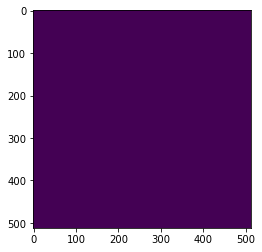

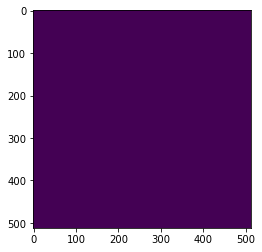

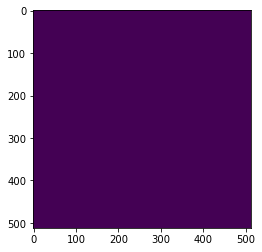

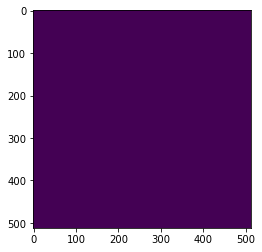

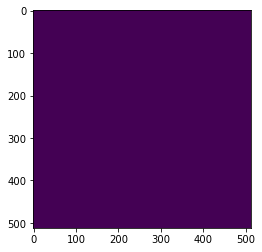

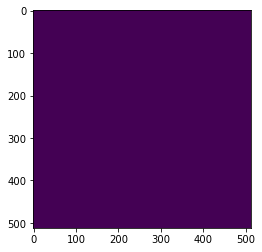

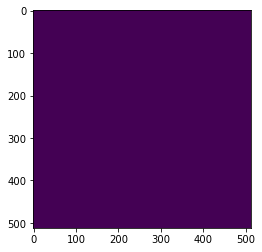

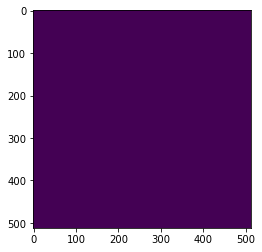

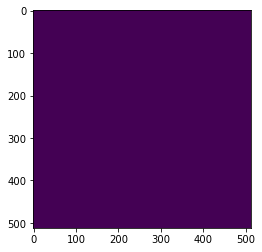

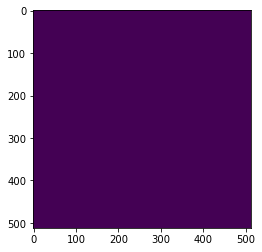

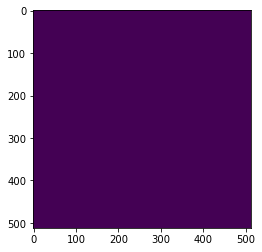

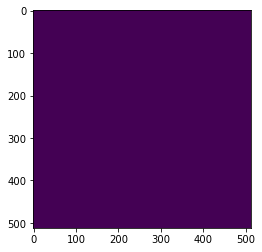

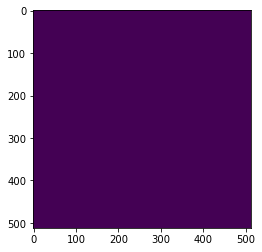

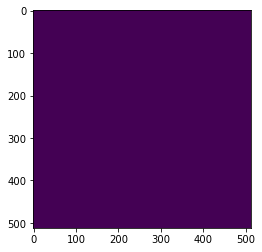

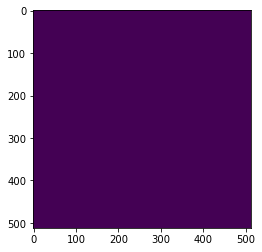

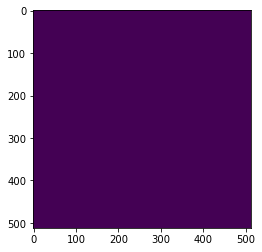

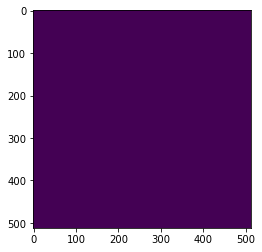

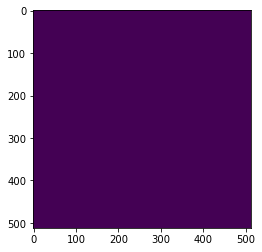

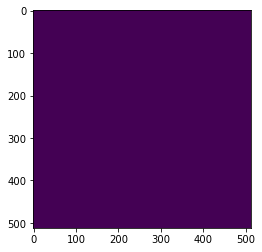

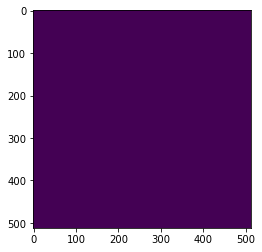

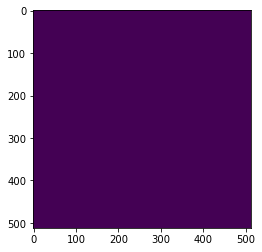

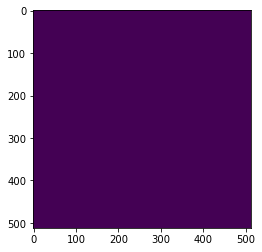

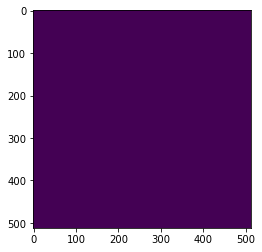

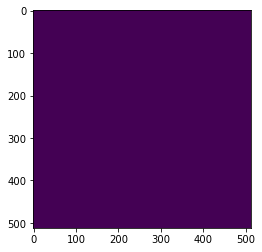

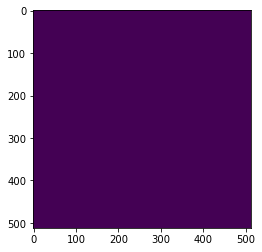

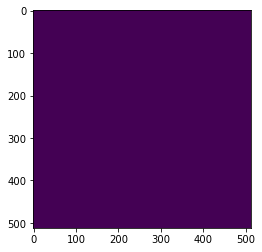

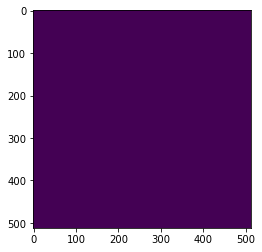

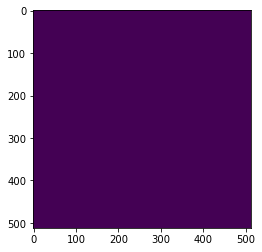

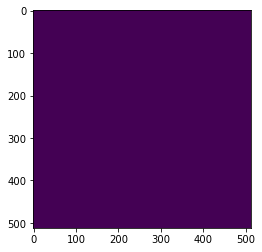

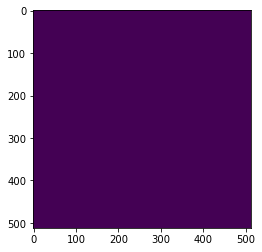

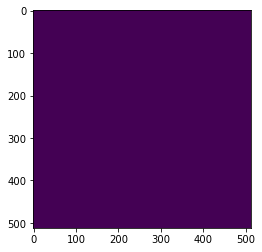

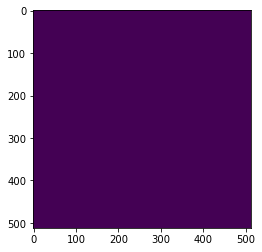

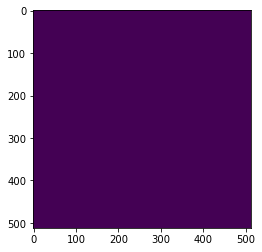

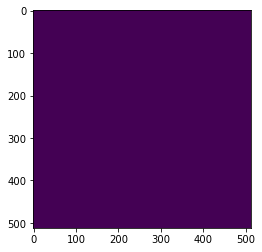

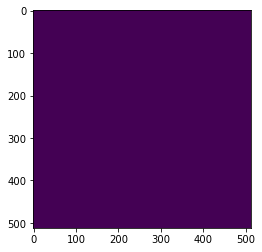

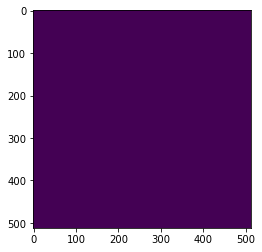

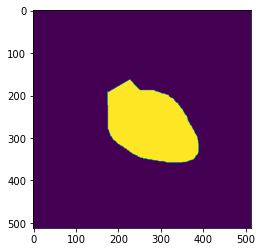

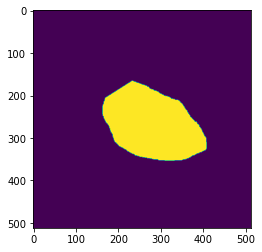

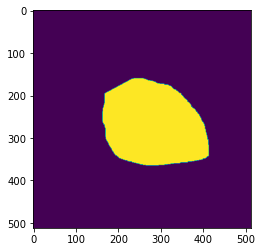

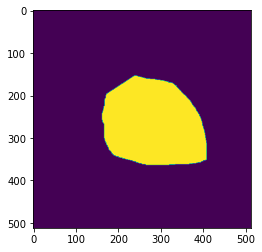

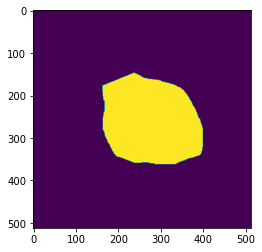

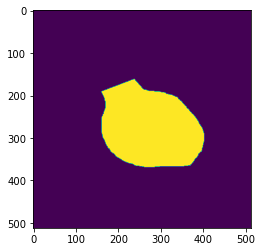

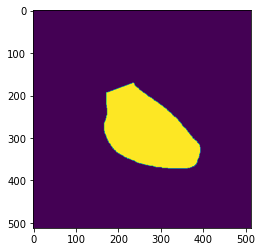

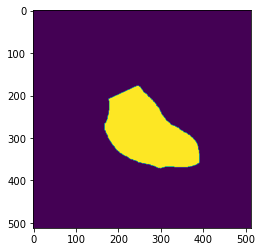

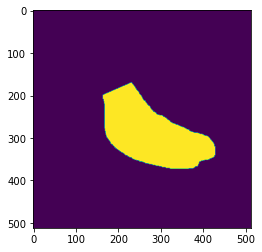

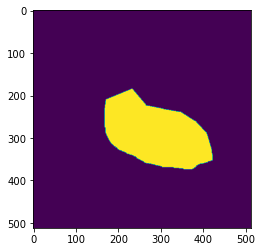

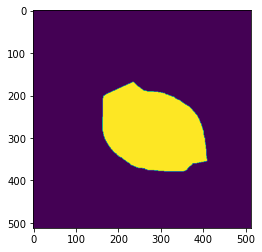

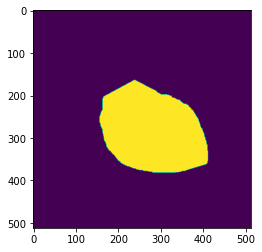

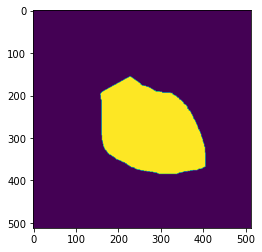

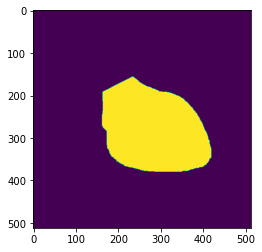

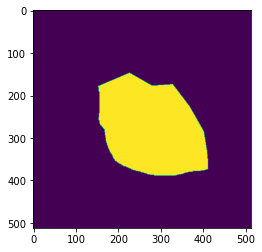

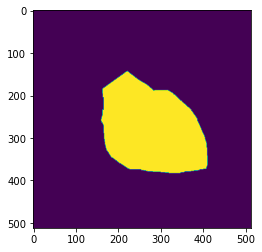

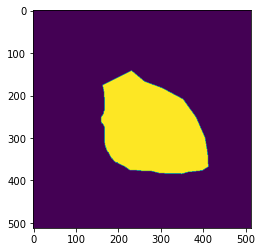

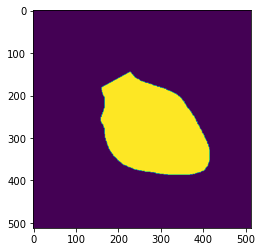

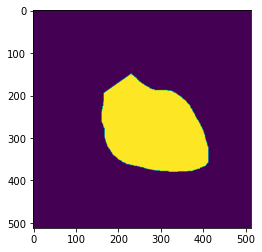

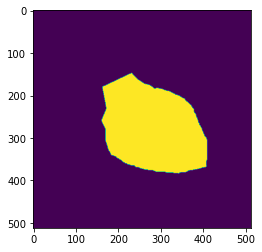

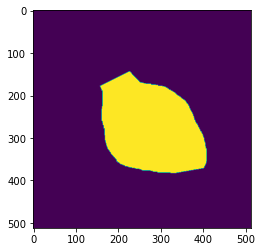

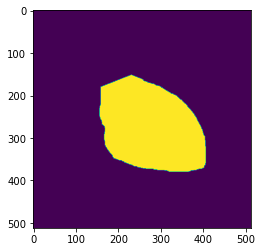

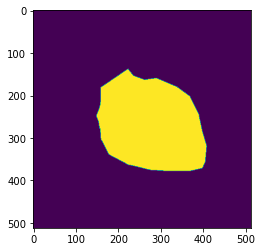

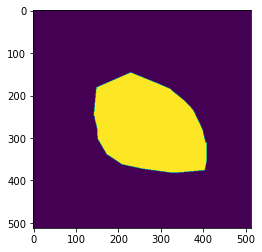

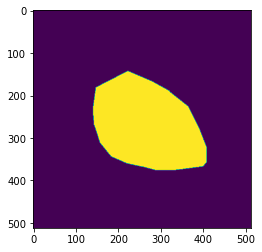

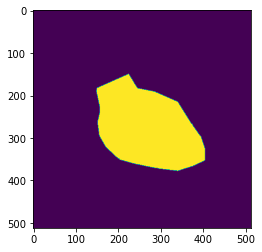

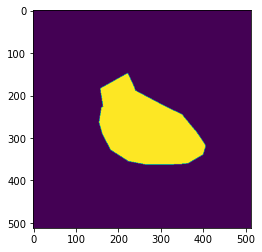

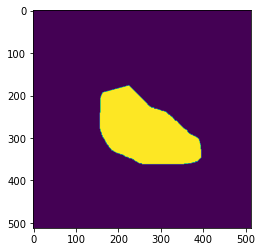

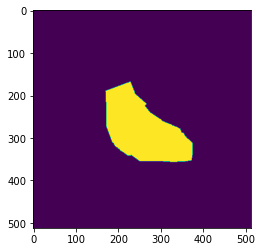

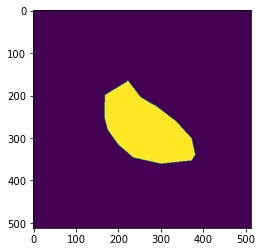

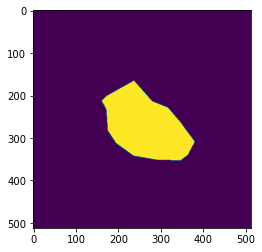

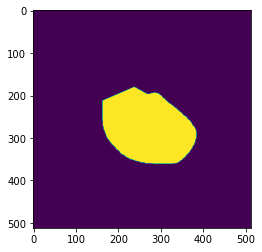

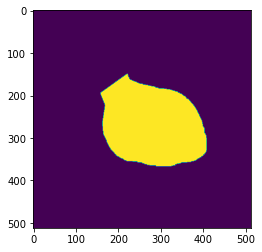

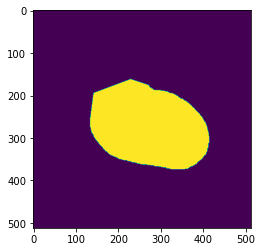

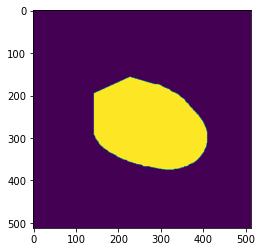

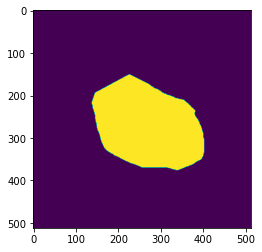

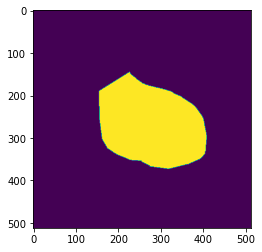

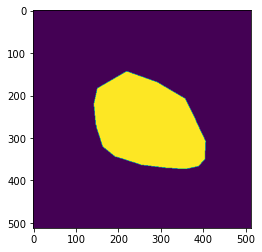

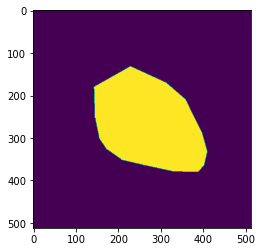

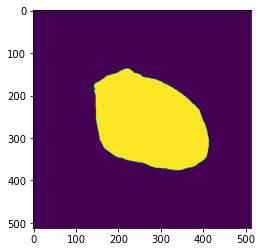

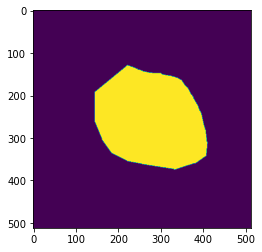

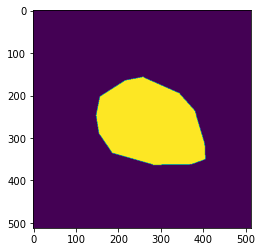

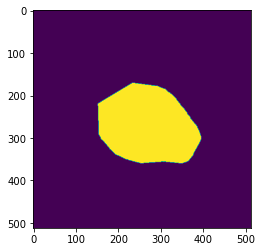

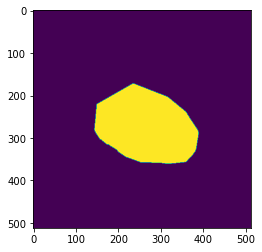

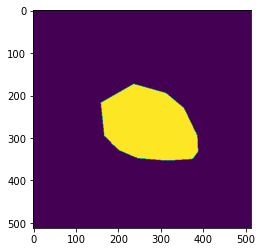

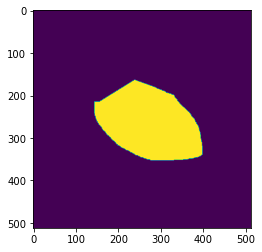

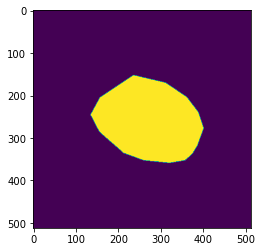

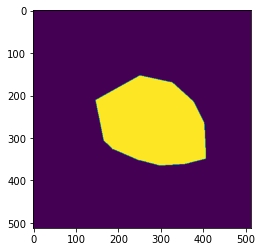

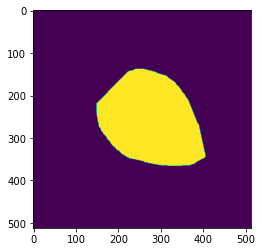

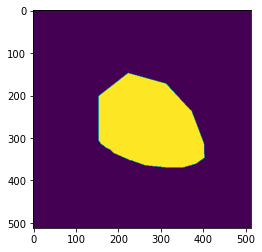

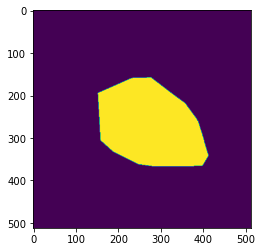

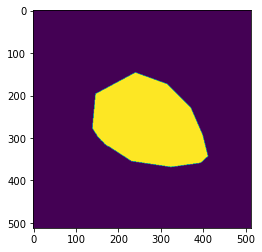

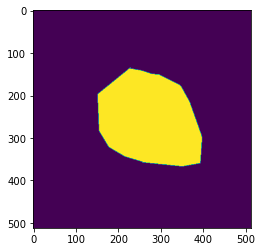

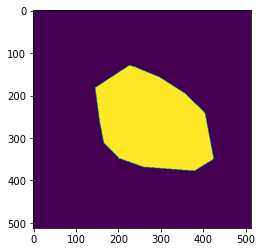

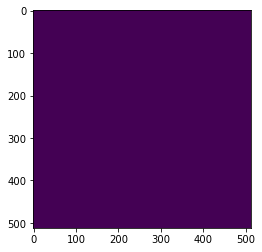

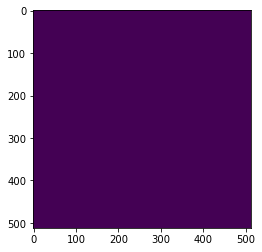

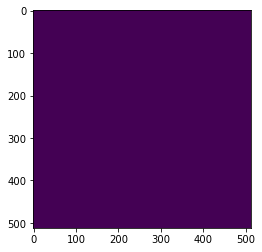

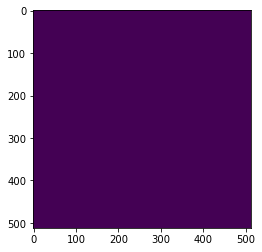

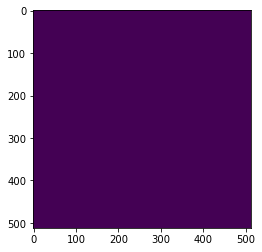

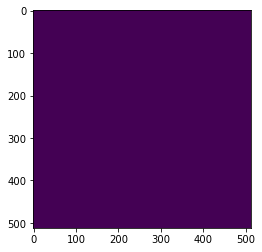

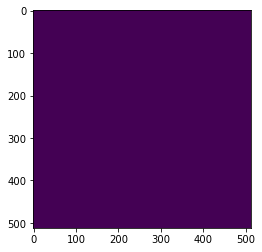

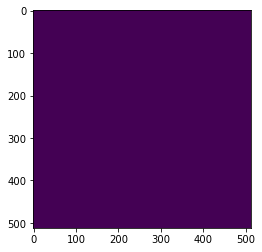

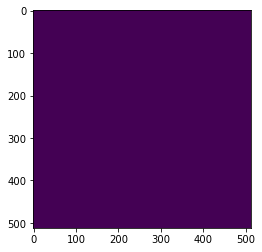

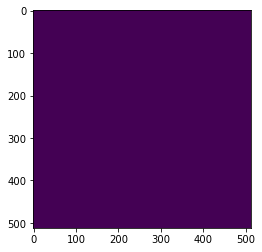

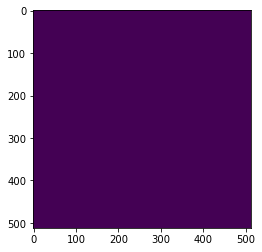

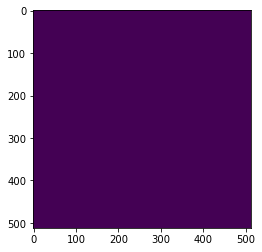

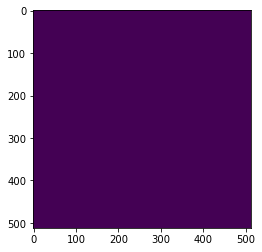

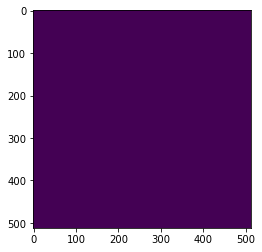

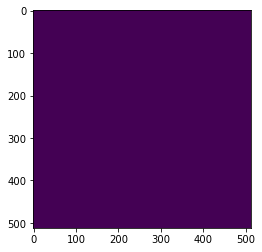

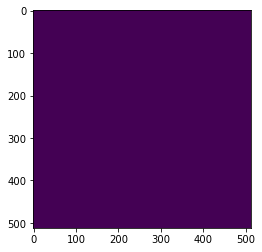

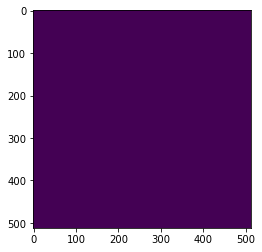

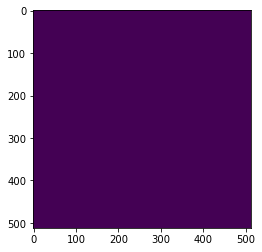

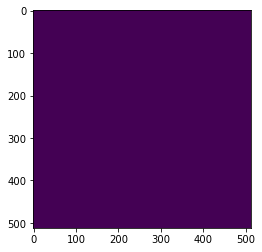

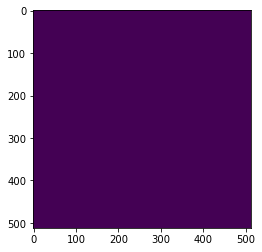

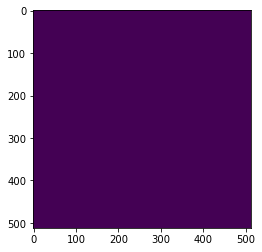

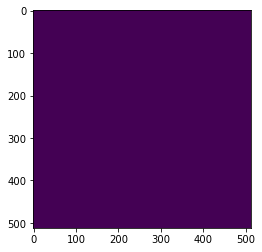

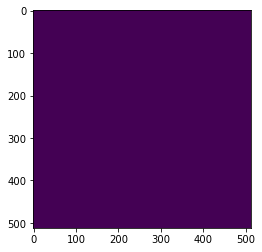

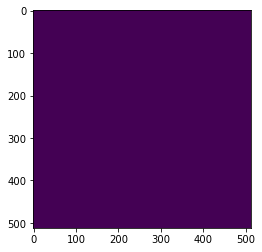

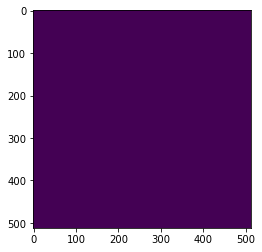

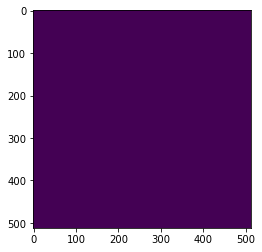

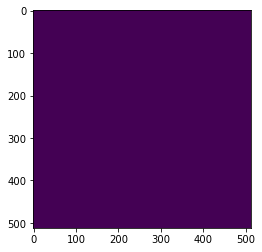

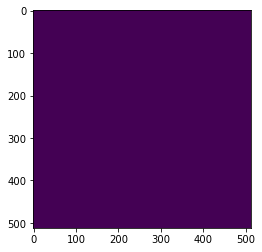

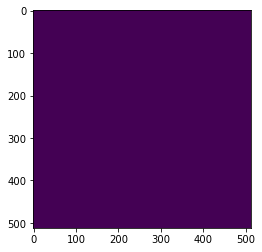

In [54]:
for i in range(masks_1.shape[2]):
    plt.imshow(masks_1[:,:,i].T)
    plt.show()
    

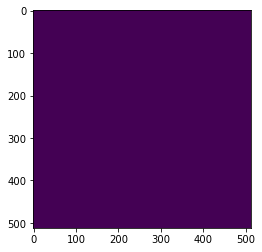

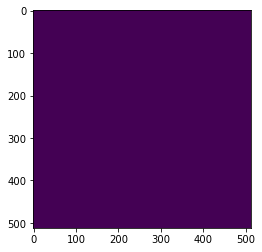

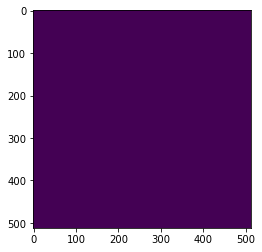

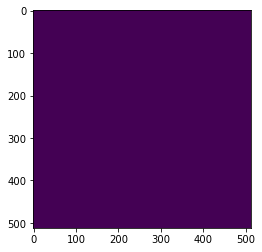

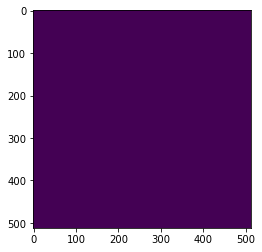

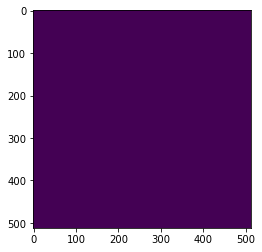

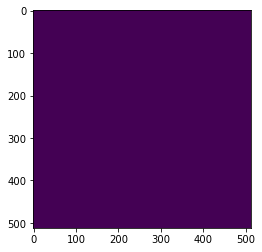

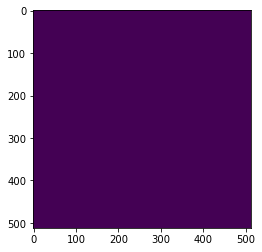

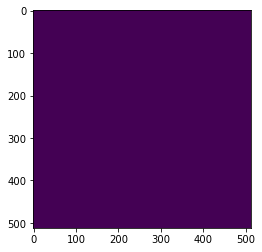

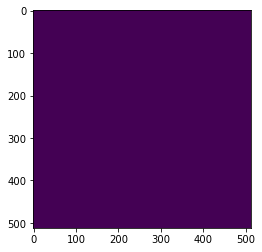

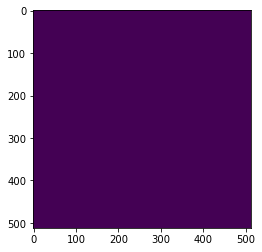

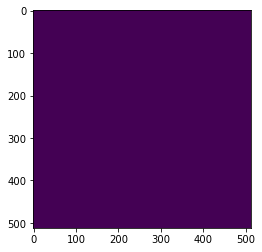

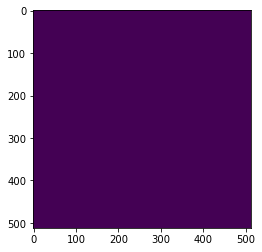

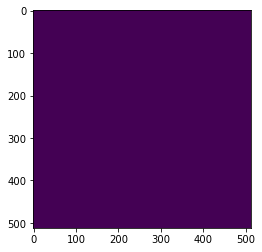

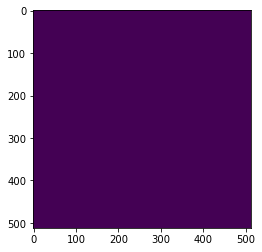

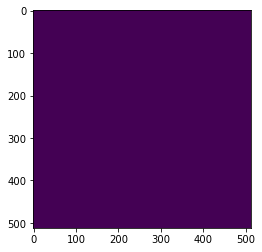

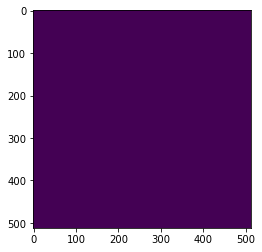

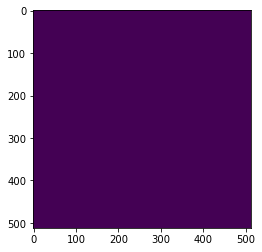

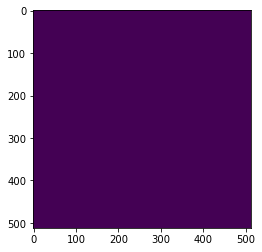

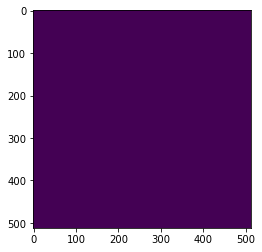

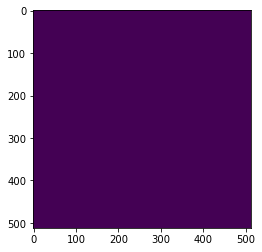

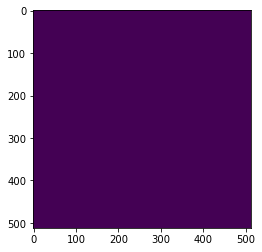

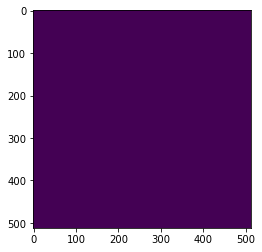

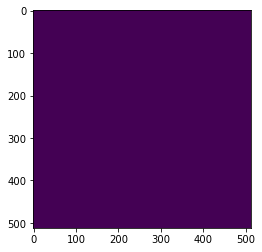

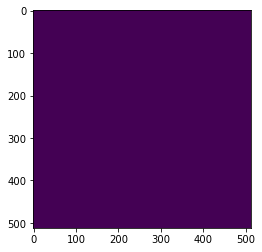

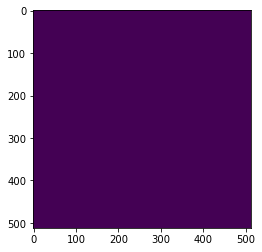

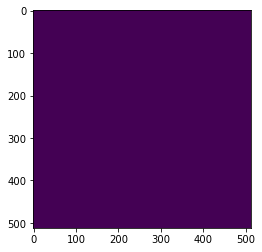

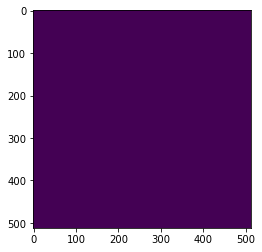

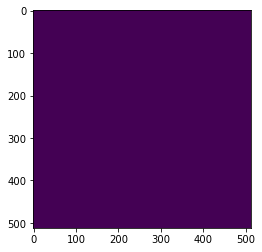

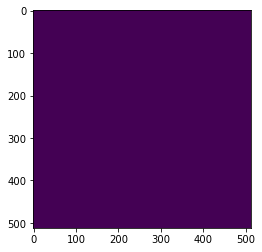

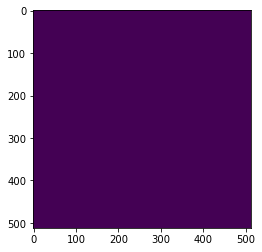

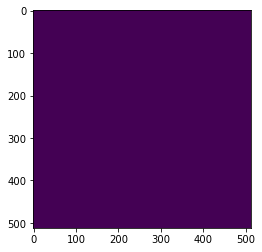

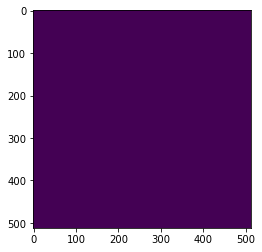

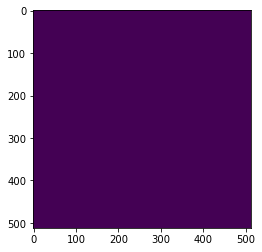

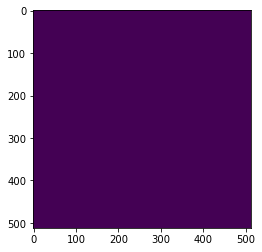

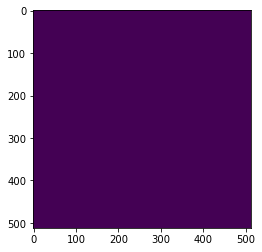

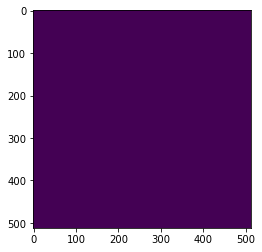

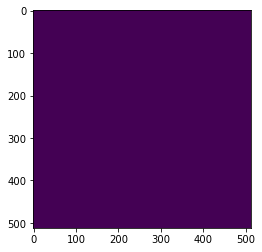

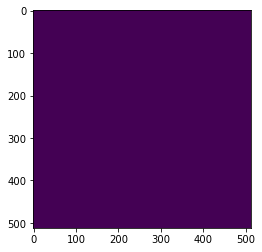

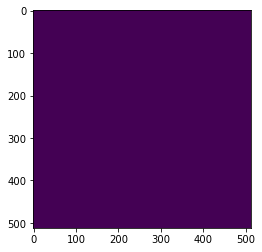

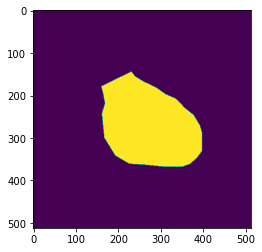

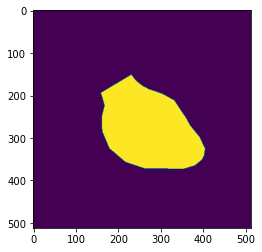

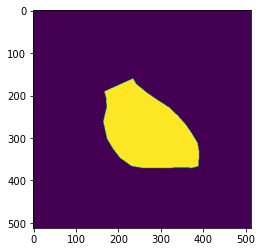

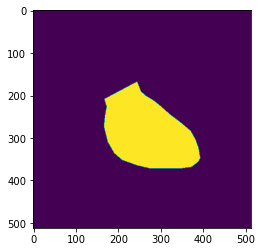

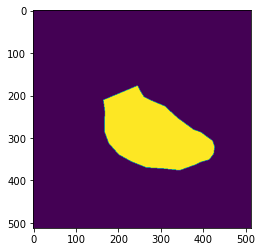

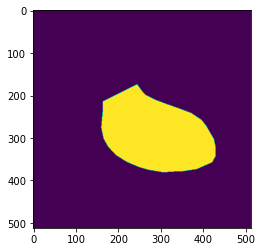

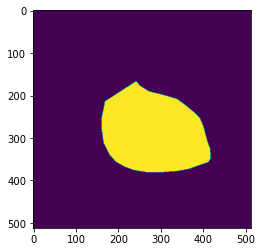

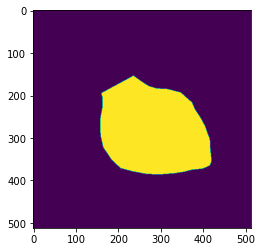

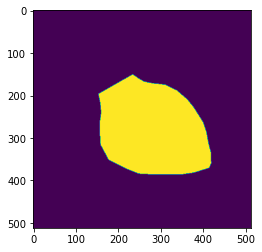

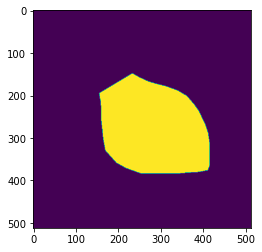

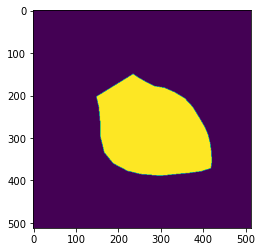

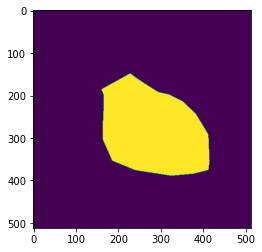

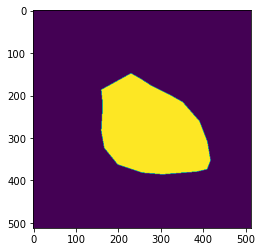

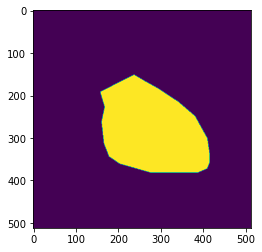

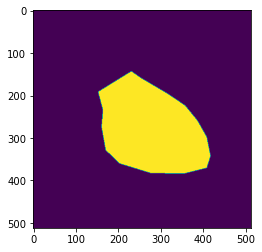

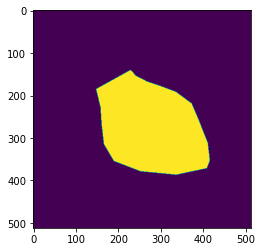

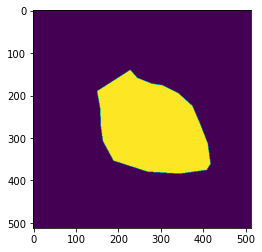

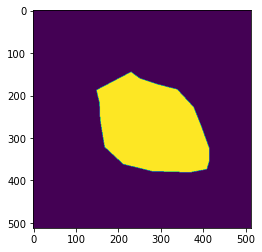

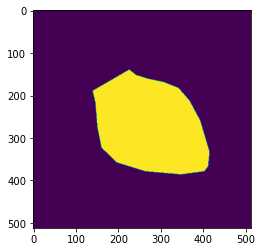

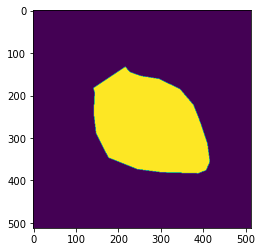

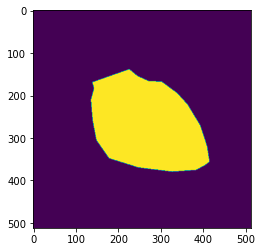

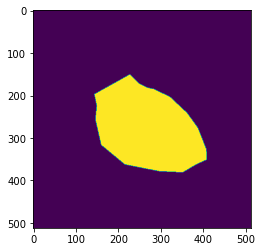

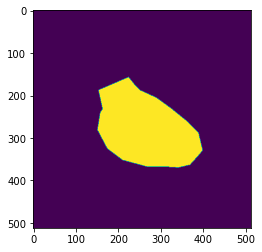

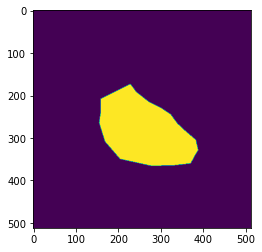

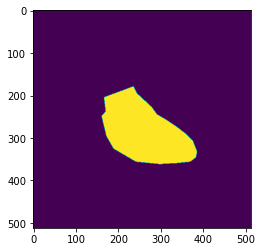

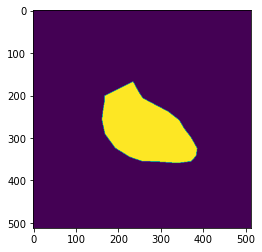

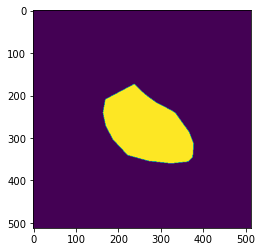

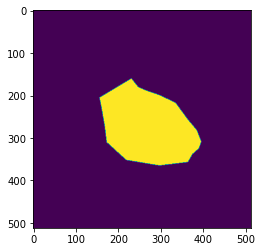

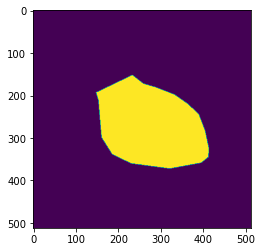

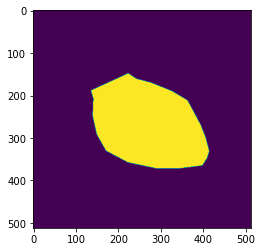

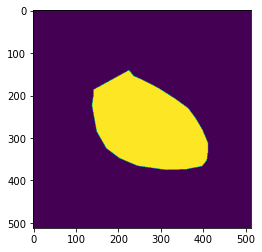

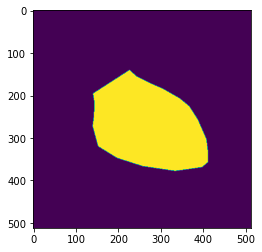

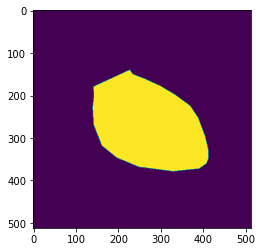

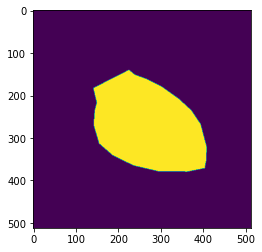

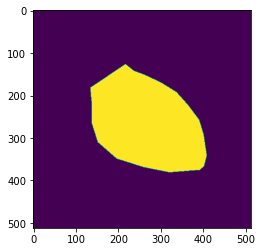

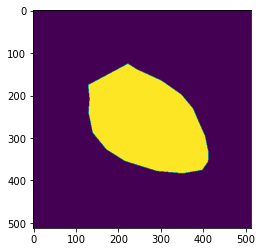

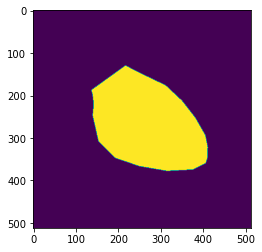

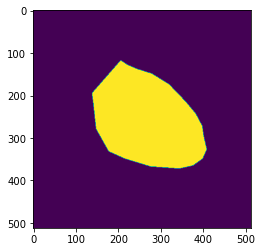

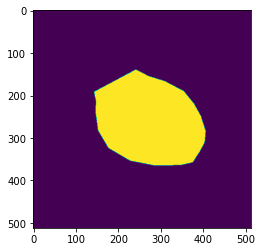

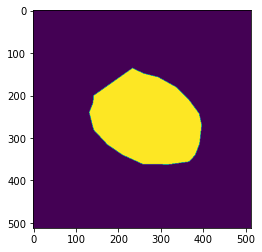

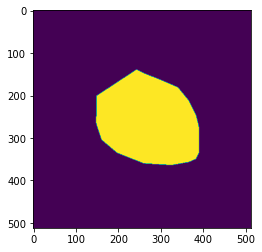

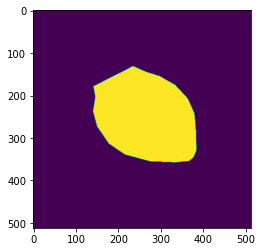

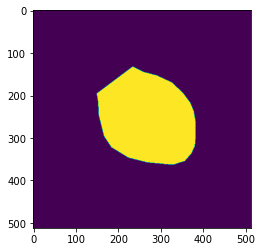

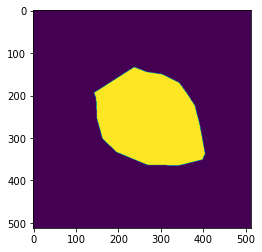

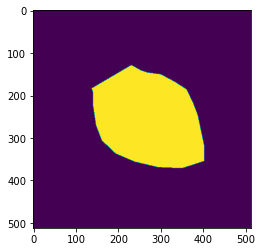

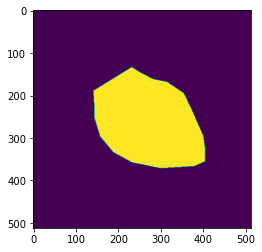

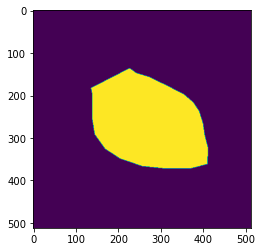

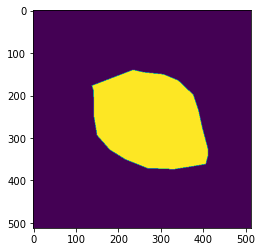

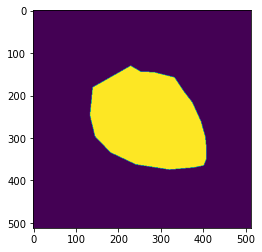

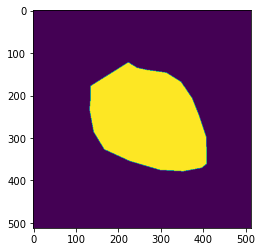

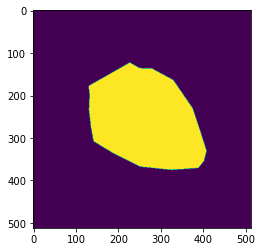

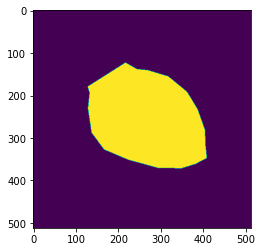

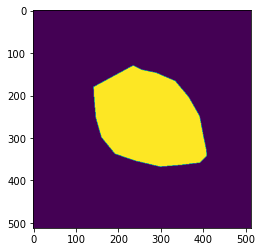

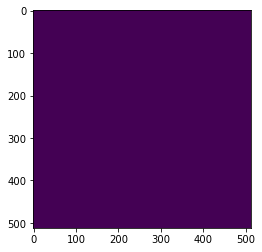

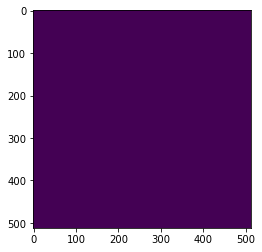

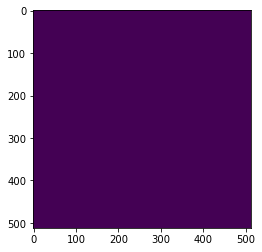

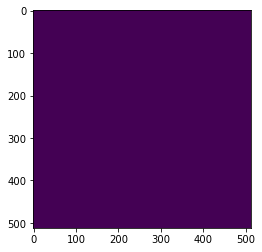

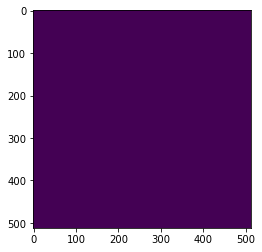

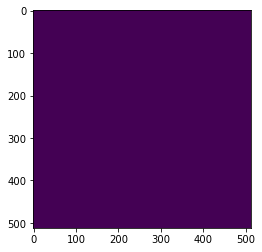

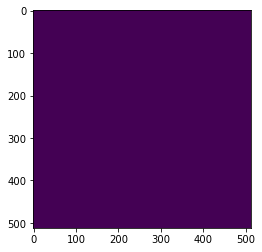

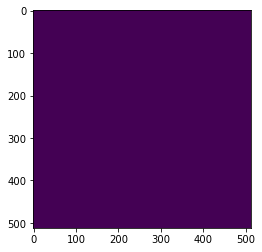

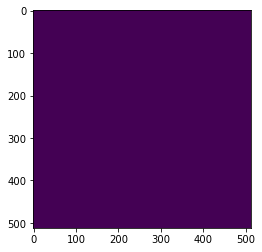

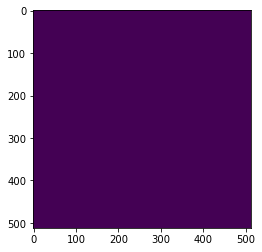

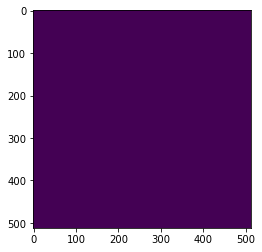

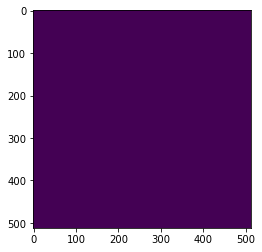

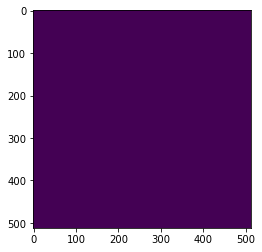

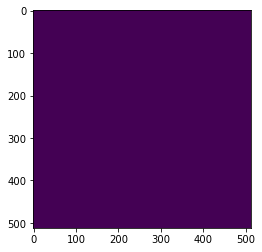

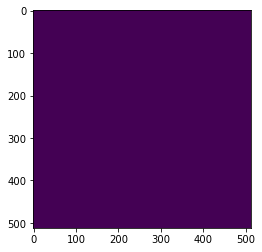

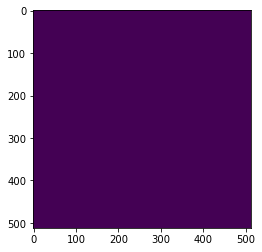

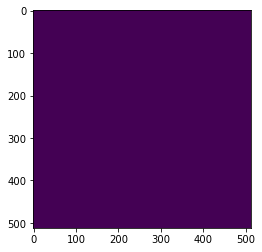

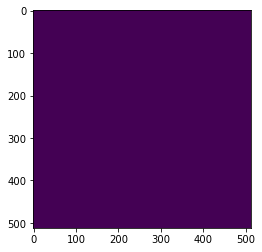

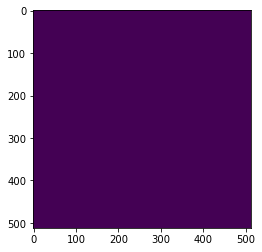

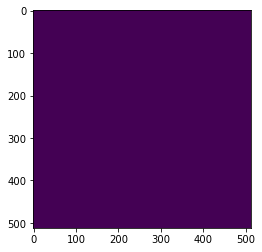

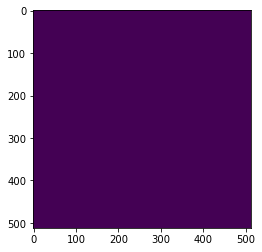

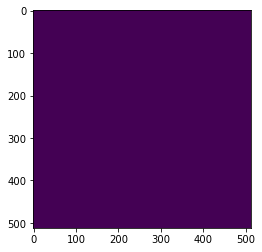

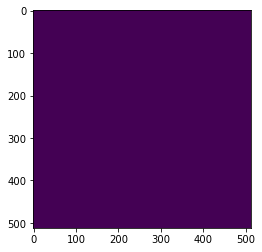

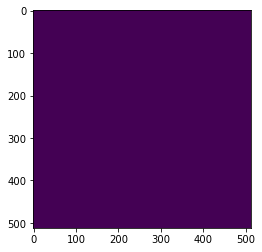

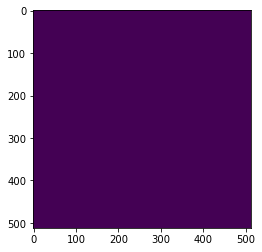

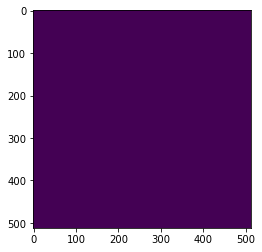

In [55]:
for i in range(masks_2.shape[2]):
    plt.imshow(masks_2[:,:,i].T)
    plt.show()

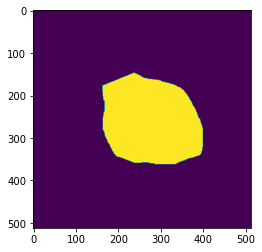

In [52]:
plt.imshow(masks_1[:,:,40].T)

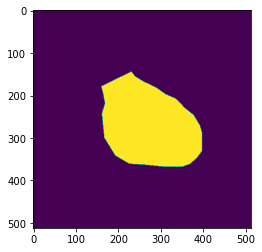

In [53]:
plt.imshow(masks_2[:,:,40].T)

In [15]:
for f in pathlib.Path(r'D:\Datasets\Cardiac_Catheterization\backup\segment\with_nii').iterdir():
    print(f.name,end='\t')
    masks = list(f.rglob('*.gz'))[0]
    masks = np.array(nibabel.load(masks.as_posix()).dataobj)
    print(masks.shape[2])
    f.joinpath('masks').mkdir()
    for i in range(masks.shape[2]):
        plt.imsave(f.joinpath('masks',f'{i:0>3}.png'),masks[:,:,i].T,cmap='gray')

3C1774 basal hypo	91
3C1942 apical hypo	77


In [26]:
plt.imsave(r'D:\Datasets\Cardiac_Catheterization\backup\segment\converted\with_lvef\2C0365 inferior hypo\test.png',a[:,:,44].T,cmap='gray')


In [18]:
a.shape

(512, 512, 186)

In [16]:
from pydicom import dcmread
for f in pathlib.Path(r'D:\Datasets\Cardiac_Catheterization\backup\segment\converted\without_lvef').iterdir():
    print(f.name,end='\t')
    ds = dcmread(list(f.glob('*.dcm'))[0].as_posix())
    imgs = ds.pixel_array
    print(imgs.shape[0])
    f.joinpath('images').mkdir()
    for i in range(imgs.shape[0]):
        plt.imsave(f.joinpath('images',f'{i:0>3}.png'),imgs[i],cmap='gray')

3C1774 basal hypo	91
3C1942 apical hypo	77


In [9]:
f

WindowsPath('D:/Datasets/Cardiac_Catheterization/backup/segment/fully_converted/0681 basal hypo')

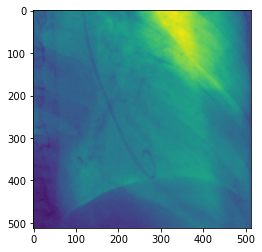

In [8]:
plt.imshow(ds.pixel_array[0])


In [47]:
import gzip
import shutil
with open(r'D:\Datasets\Cardiac_Catheterization\backup\segment\with_nii\2C7141 normal\2C7141_mask.nii', 'rb') as f_in, gzip.open(r'D:\Datasets\Cardiac_Catheterization\backup\segment\with_nii\2C7141 normal\2C7141_mask.nii.gz', 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)

In [60]:
for f in pathlib.Path(r'D:\Datasets\Cardiac_Catheterization\backup\segment\with_nii').iterdir():
    print(f.name,end='\t')
    masks = np.array(nibabel.load(list(f.rglob('*.gz'))[0].as_posix()).dataobj)
    imgs = dcmread(list(f.glob('*.dcm'))[0].as_posix()).pixel_array
    
    print('masks:',masks.shape[2], 'images:',imgs.shape[0])
    f.joinpath('masks').mkdir()
    for i in range(masks.shape[2]):
        plt.imsave(f.joinpath('masks',f'{i:0>3}.png'),masks[:,:,i].T,cmap='gray')
        
    f.joinpath('images').mkdir()
    for i in range(imgs.shape[0]):
        plt.imsave(f.joinpath('images',f'{i:0>3}.png'),imgs[i],cmap='gray')

0655 ant hypo	masks: 167 images: 167
0661 ant hypo	masks: 129 images: 129
0669 basal hypo	masks: 135 images: 135
0675 basal hypo	masks: 131 images: 131
0747 basal hypo	masks: 173 images: 173
20310 inferior hypo	masks: 124 images: 124
2C0365 inferior hypo	masks: 136 images: 136
2C0581 normal	masks: 175 images: 175
2C0584 basal hypo	masks: 178 images: 178
2C0602 apical HCM	masks: 159 images: 159
2C1487 normal	masks: 93 images: 93
2C5844 basal hypo	masks: 212 images: 212
2C6426 apical hypo	masks: 155 images: 155
2C6429 apical hypo	masks: 92 images: 92
2C6762 basal hypo	masks: 87 images: 87
2C6767 basal hypo	masks: 91 images: 91
2C6779 basal hypo	masks: 154 images: 154
2C6792 basal hypo	masks: 169 images: 169
2C6852 basal hypo	masks: 39 images: 39
2C6886 basal hypo	masks: 203 images: 203
2C7048 apical hypo	masks: 176 images: 176
2C7141 normal	masks: 135 images: 135
2C7229 (2.3) akinesis	masks: 85 images: 85
2C7364 Type1 (2.3 akinesis)	masks: 100 images: 100
2C7422 (2.3)	masks: 77 images: 7